In [4]:
from glob import glob
import numpy as np
import pandas as pd
import os

In [5]:
version          = 'sharechat_1.2.1'
client           = 'sharechat'

video_root       = f'/notebooks/common-dataset/common/{client}/video_segmented'
images_root_path = f'/notebooks/common-dataset/common/{client}/{version}/Suggested_ads'
result_path      = f'/notebooks/common-dataset/common/{client}/{version}/result.txt'
json_file_root   = f'/notebooks/common-dataset/common/{client}/{version}/json'
detected_path    = f'/notebooks/common-dataset/common/{client}/{version}/temp-media-folder/analytics'
QA_complted_list = f'/notebooks/common-dataset/common/{client}/{version}/qa_complted.txt'

json_file_paths  = glob(f'{json_file_root}/*.json')


In [6]:
df = pd.read_csv(result_path, sep=",", names=['filepath','frame', 'gender', 'category', 'color', 'pattern','user']) 
df.drop_duplicates(subset=['filepath'], inplace = True)
df.shape

(2126, 7)

In [7]:
df = df.loc[df['color'] == 'NO']

In [8]:
df.shape

(1696, 7)

In [9]:
if client == 'mx':
    total_segmented_videos    = len(glob(f'{video_root}/*'))
    print(total_segmented_videos)
else:
    total_segmented_videos    = len(glob(f'{video_root}/*'))
total_product_recommended = len(glob(f'{images_root_path}/*/multi_color_image_matching/*'))
total_videos_hit          = len(set(['_'.join(i.split('/')[-1].split('_')[0:3]) for i in glob(f'{images_root_path}/*/multi_color_image_matching/*')]))
hit_rate                  = round(total_videos_hit/total_segmented_videos*100,2)

In [10]:
total_segmented_videos

956

In [11]:
df['user'].unique()

array(['roshan', 'bigyan', 'gaurab', 'prakash', 'sangam'], dtype=object)

In [12]:
pattern = [i.split('/')[-1] for i in glob(f'{images_root_path}/*/multi_color_image_matching/*')]

In [13]:
color = [i.split('/')[-1] for i in glob(f'{images_root_path}/*/multi_color/*')]

In [14]:
len(color) -len(pattern)

-206

In [15]:
132

132

In [16]:
len(pattern)

443

In [18]:
total            = df.shape[0]

all_good_count   = ((df['gender'] == 'good') & (df['color'] == 'good') & (df['category'] == 'good') & 
                    (df['pattern'] == 'good')).tolist().count(True)

bad_gender       = df['gender'].tolist().count('bad')
good_gender      = df['gender'].tolist().count('good')

bad_color        = df['color'].tolist().count('bad')
good_color       = df['color'].tolist().count('good')
none_color       = df['color'].tolist().count('NO')

bad_category     = df['category'].tolist().count('bad')
good_category    = df['category'].tolist().count('good')

bad_pattern      = df['pattern'].tolist().count('bad')
good_pattern     = df['pattern'].tolist().count('good')
none_pattern     = df['pattern'].tolist().count('NO')

bad_frame        = df['frame'].tolist().count('bad')
good_frame       = df['frame'].tolist().count('good')


# total_product_recommended = bad_pattern + good_pattern
# best_recommendation_percent = round(all_good_count/total_product_recommended*100,2) 

In [98]:
best_recommendation_percent

83.49

In [19]:
d = {'client':client, 'version': version, 'total_qa':[total],'total_segmented_videos':[total_segmented_videos],
#      'total_product_recommended':[bad_pattern+good_pattern],
     'total_videos_hit':[total_videos_hit],'hit_rate_in_percent':[hit_rate],
#      'best_recommendation (all_metrics_good)':all_good_count, 
#      'best_recommendation (%)':best_recommendation_percent,
     'bad_gender': [bad_gender], 'good_gender':[good_gender],
     'bad_color':[bad_color], 'good_color':[good_color], 
     'none_color':[none_color], 'bad_category':[bad_category],
     'good_category':[good_category],'bad_pattern':[bad_pattern],
     'good_pattern':[good_pattern], 'none_pattern':[none_pattern], 
     'bad_frame':[bad_frame],'good_frame':[good_frame]}
df_analysis = pd.DataFrame(data=d ,index = [version])
# df_analysis.to_csv('all_analysis.csv', index = False)
df_previous = pd.read_csv('all_analysis.csv')

In [20]:
df_analysis.to_csv(f'{version}.csv', index = False)
if not df_previous['version'].isin(df_analysis['version'].values.tolist()).any():
    df_analysis.to_csv(f'all_analysis.csv', mode = 'a', index = False, header = False)
    df_previous = pd.read_csv('all_analysis.csv')
    print('added_sucessfully')
else:
    print('this version is already recorded')

this version is already recorded


In [21]:
df_previous = pd.read_csv('all_analysis.csv', index_col = 'version')

In [22]:
set(['_'.join(i.split('/')[-1].split('_')[0:3]) for i in glob(f'{images_root_path}/*/multi_color_image_matching/*')]) - set(['_'.join(i.split('/')[-1].split('_')[0:3]) for i in df['filepath'].tolist()])

{'395d5f0f_1631918670325_2',
 '395e4a72_1631710117164_0',
 '395e57b5_1633311148070_0',
 '396072ff_1634706096399_3',
 '3965231f_1632748153331_4',
 '39680361_1631307716172_0',
 '396cff11_1630380288124_0',
 '396deafc_1629926939507_0',
 '396fb7b1_1630132870630_1',
 '39702373_1631876666626_0',
 '39716321_1630075522897_0',
 '3974df1c_1630248132265_1',
 '397e6282_1629636264946_0',
 '397ec326_1633030070130_0',
 '3989281d_1634752440834_0',
 '398aa455_1634623446021_2',
 '399113db_1631475080756_1',
 '3993dcc0_1629551067251_0',
 '39945731_1631098540877_0',
 '3995ea07_1629996034608_0',
 '399a3410_1632386846537_0',
 '399b743a_1632923007016_2',
 '399b743a_1632923007016_3',
 '399fca15_1631228020888_0',
 '39a09a7d_1633521201239_0',
 '39a0bed0_1632094721657_1',
 '39a33063_1631602102018_1',
 '39a556f1_1632380716180_0',
 '39a8472e_1631098591765_1',
 '39ac16a9_1629934326309_0',
 '39ae1517_1633016678437_0',
 '39afb245_1632151305927_1',
 '39b26729_1631365372366_1',
 '39b69065_1631918796692_0',
 '39b6be3e_163

In [23]:
all_cat =  ['_'.join(i.split('.')[0].split('_')[-2:]).strip('HSV0123456789').lstrip('_') for i in df['filepath']]
df_all_cat = pd.DataFrame (all_cat, columns = ['all_cat'])

In [24]:
df_all_cat['all_cat'].value_counts()['half_tshirt']

273

In [25]:
bad_cat_only =  ['_'.join(i.split('.')[0].split('_')[-3:]).strip('HSV0123456789').lstrip('_') for i in df[df['category'] == 'bad']['filepath']]
df_bad = pd.DataFrame (bad_cat_only, columns = ['bad_cat'])

In [26]:
bad_color_only =  ['_'.join(i.split('_')[:2]) for i in df[df['color'] == 'bad']['filepath']]
bad_color_only
with open('bad_color_1.1.4.txt', 'w') as f:
    for i in bad_color_only:
        f.write(f'{i}\n')

In [27]:
none_data =  [i for i in df[df['pattern'] == 'NO']['filepath']]
none_data
with open('none_1.2.txt', 'w') as f:
    for i in none_data:
        f.write(f'{i}\n')

In [28]:
bad_cat_videos = (['_'.join(i.split('_')[:2]) for i in df[df['category'] == 'bad']['filepath']])

In [29]:
good_cat_only =  ['_'.join(i.split('.')[0].split('_')[-2:]).strip('HSV0123456789').lstrip('_') for i in df[df['category'] == 'good']['filepath']]
df_good = pd.DataFrame (good_cat_only, columns = ['good_cat'])

In [30]:
good_cat_only =  ['_'.join(i.split('.')[0].split('_')[-3:]).strip('HSV0123456789_').lstrip('_') for i in df[df['category'] == 'good']['filepath']]
df_good = pd.DataFrame (good_cat_only, columns = ['good_cat'])

In [31]:
df_bad['bad_cat'].value_counts()['full_shirt']/df_all_cat['all_cat'].value_counts()['half_tshirt']

0.07692307692307693

# PLOT

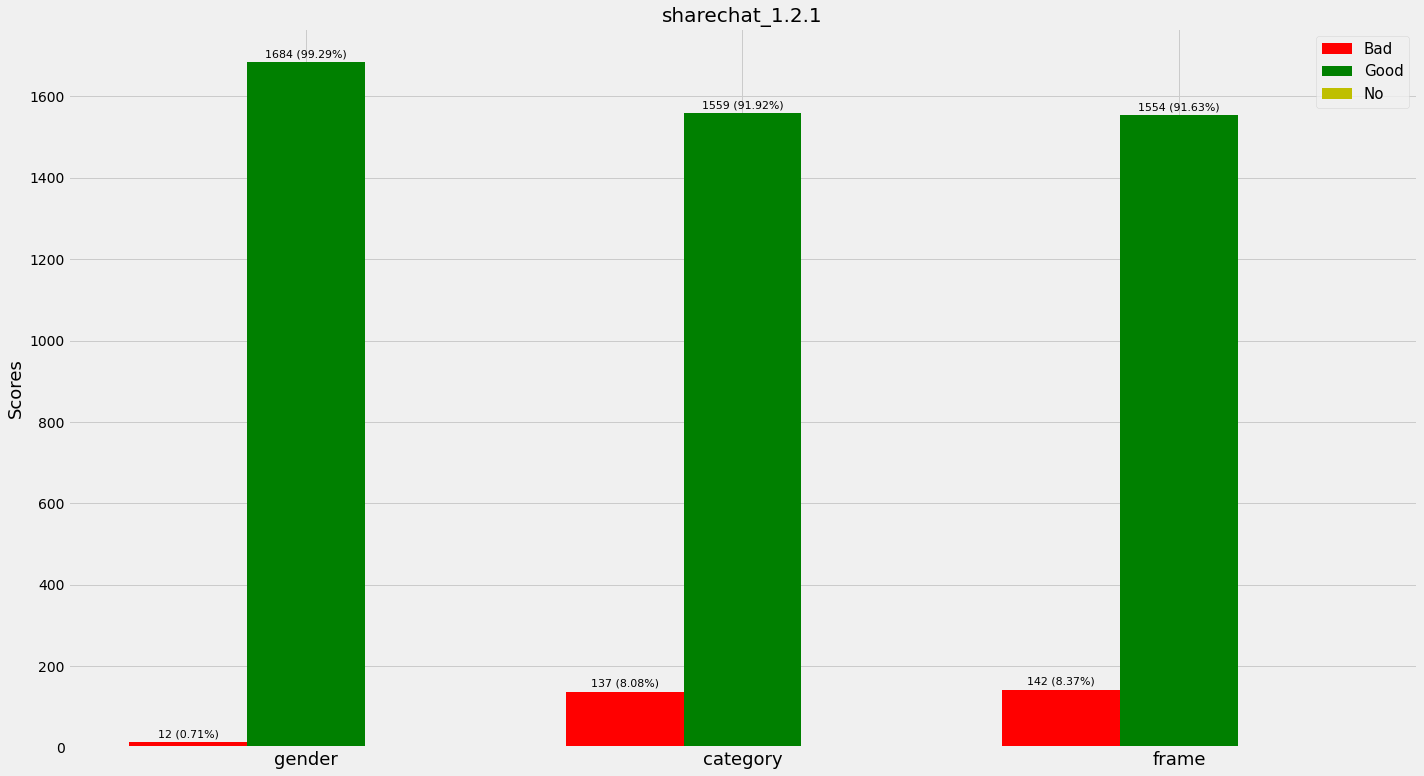

In [44]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['gender', 'category', 'frame']
good = [good_gender, good_category,  good_frame]
bad =[bad_gender, bad_category,  bad_frame]
no = [0, 0 ,  0]

plt.style.use('fivethirtyeight')
x = np.arange(len(labels))  # the label locations
width = 0.27  # the width of the bars

fig, ax = plt.subplots(figsize=(20,11))
rects1 = ax.bar(x - width, bad, width = width, label='Bad', color='r')
rects2 = ax.bar(x , good, width, label='Good', color='g')
rects3 = ax.bar(x + width, no, width, label='No', color='y')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores', fontdict = {'fontsize': 18})
ax.set_title(f'{version}', fontdict = {'fontsize': 20})
ax.set_xticks(x)
ax.tick_params(bottom=False)
ax.set_xticklabels(labels, fontdict = {'fontsize': 18})
ax.legend( prop={'size': 15})

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        if height != 0:
            ax.annotate(f"{height} ({round(height/total*100,2)}%)",
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points", size = '11',
                        ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


fig.tight_layout()

plt.savefig(f'{version}_graph.png')
plt.show()

In [45]:
df_analysis

,client,version,total_qa,total_segmented_videos,total_videos_hit,hit_rate_in_percent,bad_gender,good_gender,bad_color,good_color,none_color,bad_category,good_category,bad_pattern,good_pattern,none_pattern,bad_frame,good_frame
sharechat_1.2.1,sharechat,sharechat_1.2.1,1696,956,398,41.63,12,1684,0,0,1696,137,1559,0,0,1696,142,1554


In [46]:
df_plotly = pd.DataFrame({'labels':labels, 'good':good, 'bad':bad, 'none':no})

In [47]:
df_plotly

,labels,good,bad,none
0,gender,1684,12,0
1,category,1559,137,0
2,frame,1554,142,0


In [49]:
import plotly.express as px

fig = px.bar(df_plotly, x="labels", y=['good', 'bad'], barmode = 'relative',
              color_discrete_map = {'none':'yellow', 'good':'green', 'bad': 'red'},
              title=(f'{version}_none'),width=None, height=None)

texts = [good, bad]
for i, t in enumerate(texts):
    fig.data[i].text = [f"{round(x/total*100,2)} %" for x in t]
    fig.data[i].textposition = 'outside'
fig.show()
 

In [87]:
df_previous.transpose()

version,sharechat_1.1.4,sharechat_1.2,mx_1.1.4,mx_1.2,sharechat_1.2.1,mx_1.2.1
client,sharechat,sharechat,mx,mx,sharechat,mx
total_qa,1271,1330,1281,1228,2126,625
total_segmented_videos,956,956,588,588,956,588
total_product_recommended,351,325,303,313,430,64
total_videos_hit,355,332,239,240,398,60
hit_rate_in_percent,37.13,34.73,40.65,40.82,41.63,10.2
best_recommendation (all_metrics_good),223,270,214,221,359,47
best_recommendation (%),63.53,83.08,70.63,70.61,83.49,73.44
bad_gender,28,5,13,5,16,5
good_gender,1243,1325,1268,1223,2110,620
